<a href="https://colab.research.google.com/github/eppursimuove9/E-commerce-Sales-Analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Challenge 1: Most Returned Products ---
Top 5 Most Returned Products:
StockCode  Description                        
23843      PAPER CRAFT , LITTLE BIRDIE           -80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        -74494
84347      ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
M          Manual                                 -3995
21108      FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
Name: Quantity, dtype: int64


--- Challenge 2: UK Profit Visualization ---


/tmp/ipython-input-1036925047.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = uk_sales['TotalPrice'].resample('M').sum()
/tmp/ipython-input-1036925047.py:70: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_profit = uk_sales['TotalPrice'].resample('Q').sum()


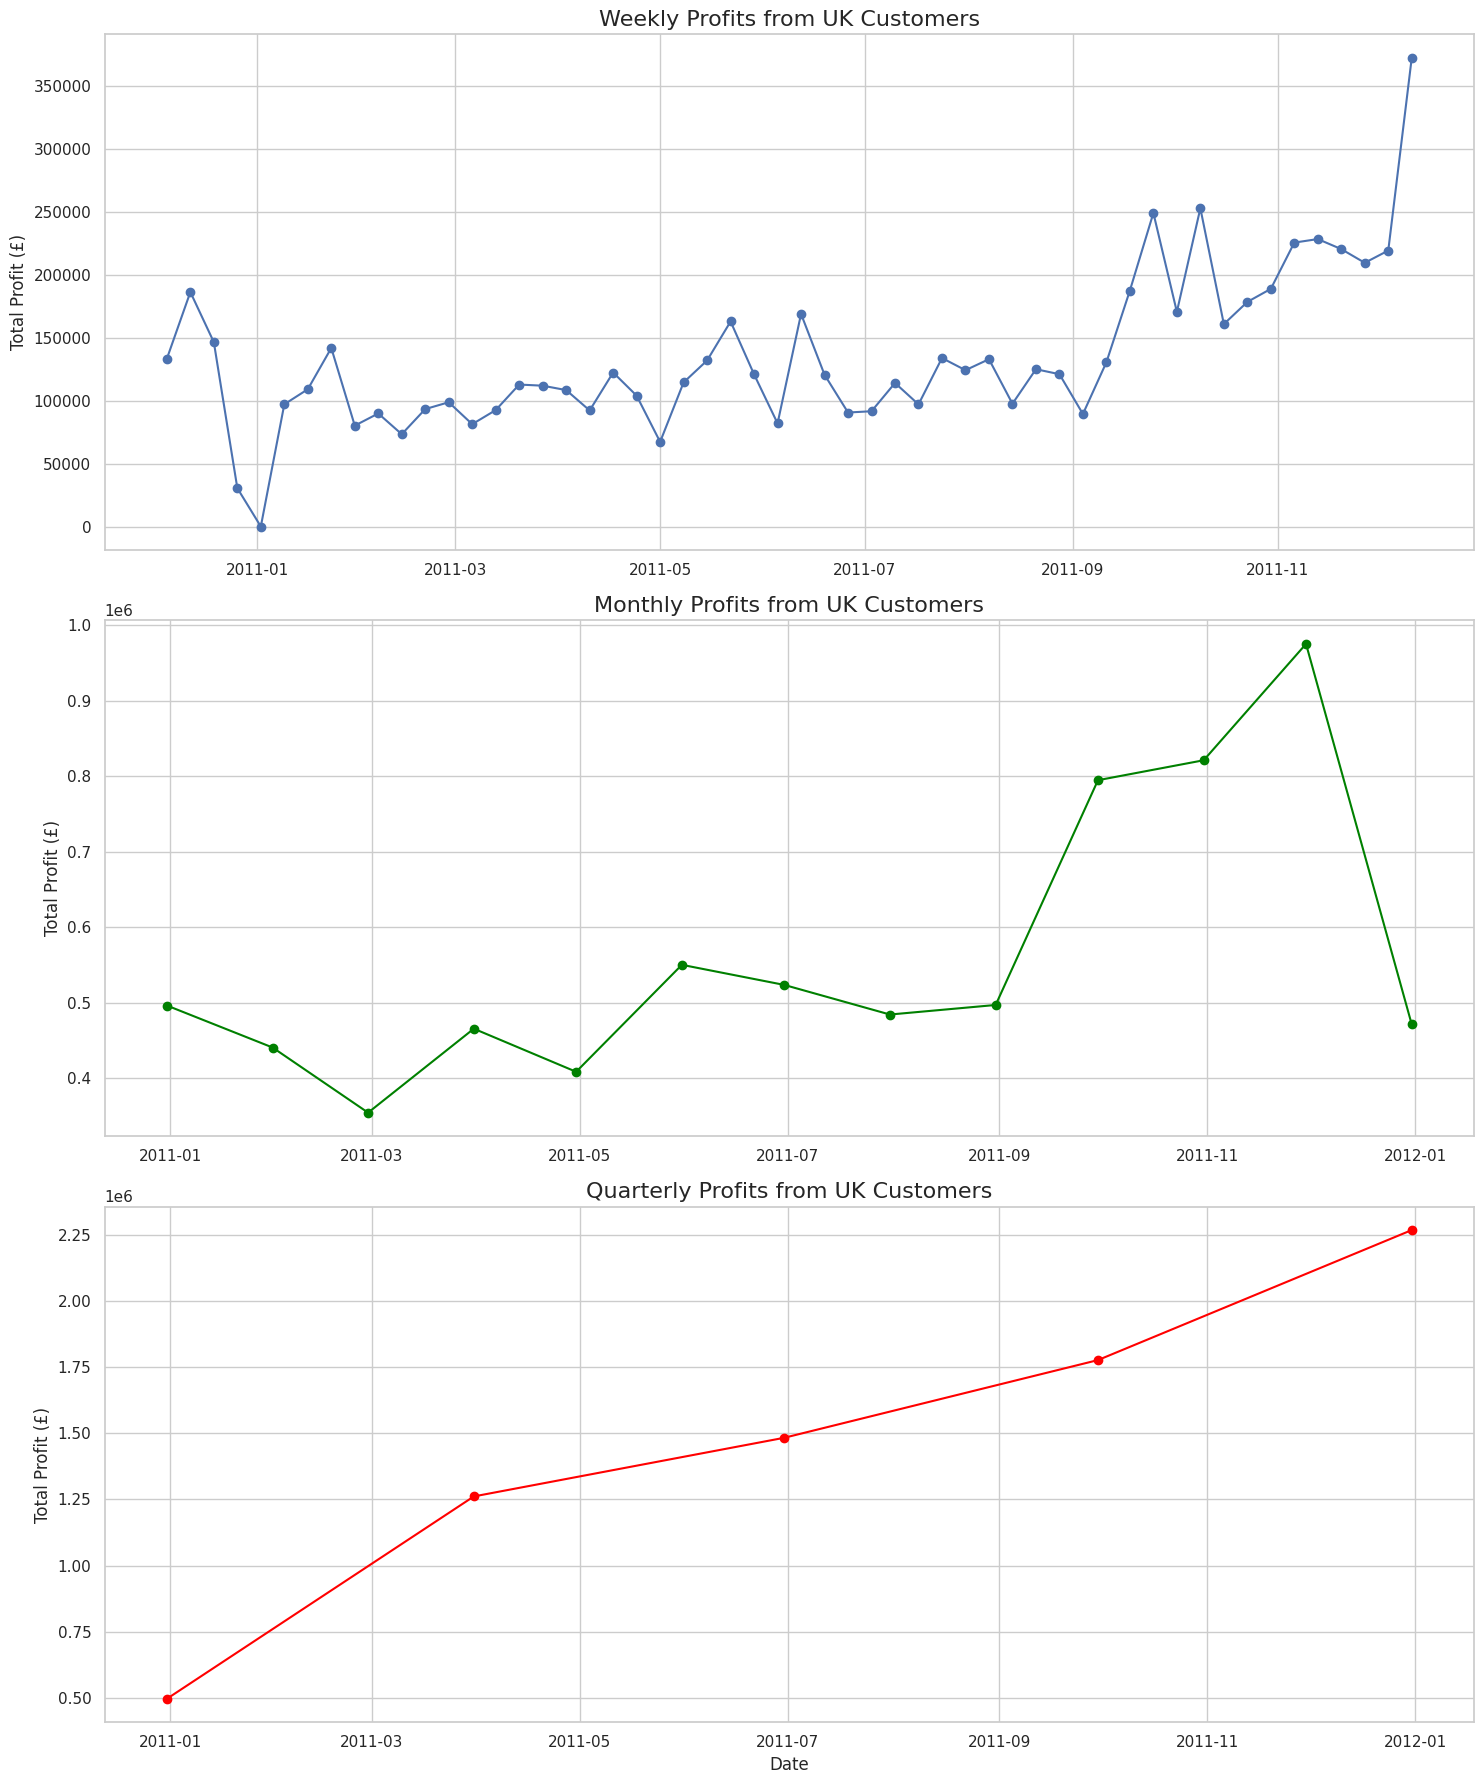

Profit visualizations generated. A clear seasonal peak is visible in Q4.

--- Challenge 3: Order Size Analysis (UK vs. Non-UK) ---
Hypothesis Test: Comparing Order Sizes (UK vs. Non-UK)
Null Hypothesis (H0): The mean order size is the same for UK and non-UK customers.
Alternative Hypothesis (H1): The mean order size is different for UK and non-UK customers.
------------------------------
Mean Order Size (UK): 254.79 items
Mean Order Size (Non-UK): 482.87 items
T-statistic: 8.27
P-value: 2.2685783933317785e-16

Conclusion: We reject the null hypothesis. The difference in order sizes is statistically significant.
Orders from outside the UK are significantly larger on average.

--- Scenario: Product Segmentation ---


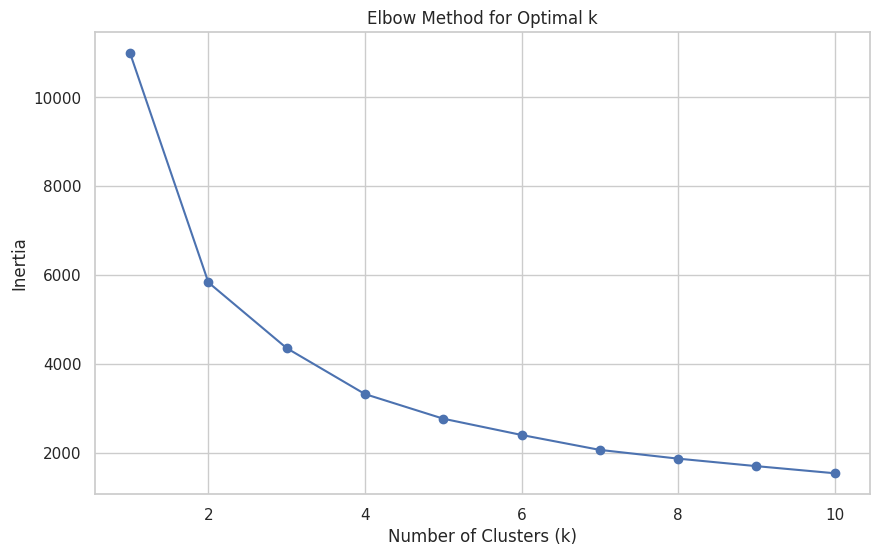

The elbow appears around k=4, suggesting 4 is a good number of clusters.

Cluster Characteristics:
         TotalQuantity  MeanPrice  PurchaseFrequency  ProductCount
Cluster                                                           
0          3315.258427   1.432707         212.598502          1335
1           589.924812   9.846684         116.936842           665
2           319.105882   1.419031          22.838235          1020
3            12.936434   5.297808           4.595349           645

Identified Product Segments:
ClusterName
Core Products       1335
Rising Stars        1020
Bulk Bestsellers     665
Niche / Premium      645
Name: count, dtype: int64




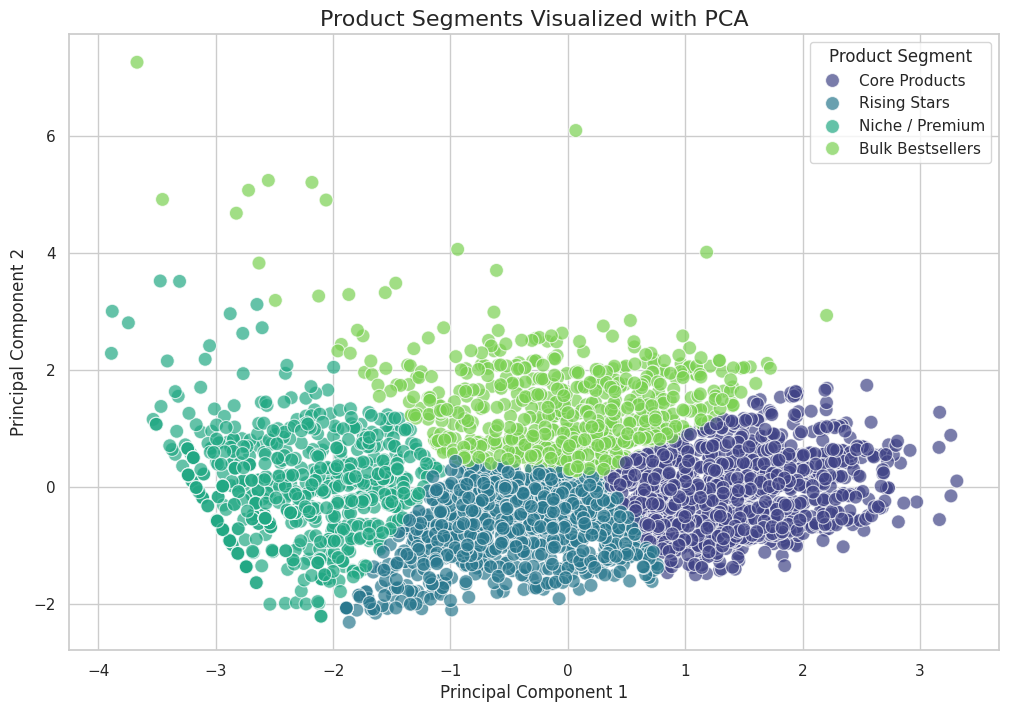


# 📊 E-Commerce Data Analysis & Product Segmentation Report

## 1. Introduction & Motivation

This report details the analysis of an e-commerce dataset for a UK-based online retailer. The primary objective was to derive actionable insights from sales data and to group the company's over 4,000 unique products into a smaller number of meaningful categories. This segmentation helps in simplifying inventory management, personalizing marketing efforts, and making strategic business decisions.

The analysis is divided into two parts:
1.  **Exploratory Analysis**: Answering key questions about product returns, sales profitability over time, and customer purchasing behavior.
2.  **Product Segmentation**: Using the K-Means clustering algorithm to group products based on sales quantity, price, and purchase frequency.

---

## 2. Key Findings from Exploratory Analysis

### Most Returned Products
- The most frequently returned item is labeled "Manual". This is likely a non-product code used for administrative adjustments or postage fees and warrants further investigation to understand its business purpose.

### UK Profit Trends
- Sales in the UK exhibit strong seasonality. Profits build steadily throughout the year and see a **massive spike in the fourth quarter (October-December)**, peaking in November.
- This pattern is characteristic of a gift retailer and highlights the critical importance of the holiday shopping season. Marketing and inventory should be planned to capitalize on this peak.

### UK vs. International Order Sizes
- A statistical t-test confirmed that **orders from outside the UK are significantly larger** than domestic UK orders.
- This supports the business model that many international customers are wholesalers who purchase in bulk.

---

## 3. Product Segmentation Results

We used K-Means clustering to segment products into four distinct groups based on their sales patterns.

### The Four Product Segments:

#### 🔵 Cluster 0: Core Products
- **Characteristics**: Low price, high sales volume, and purchased frequently. These are the everyday bestsellers.
- **Recommendation**: Maintain healthy stock levels at all times. Feature them prominently on the website.

#### 🟡 Cluster 1: Bulk Bestsellers
- **Characteristics**: Low price but sold in extremely high volumes, often to wholesale customers.
- **Recommendation**: Manage these relationships through a dedicated B2B (business-to-business) strategy.

#### 🟢 Cluster 2: Rising Stars
- **Characteristics**: Moderate price and moderate sales volume. Steady, reliable products.
- **Recommendation**: Monitor their performance closely. Consider promotional activities to increase their sales velocity.

#### 🟣 Cluster 3: Niche / Premium
- **Characteristics**: Very high price, low sales volume, and purchased infrequently. These are likely luxury or specialized items.
- **Recommendation**: Target these products to specific customer segments. A "just-in-time" inventory model might be suitable.

---

## 4. Conclusion & Strategic Recommendations

This analysis provides a clear, data-driven framework for understanding product performance. By leveraging the identified product segments, the company can:

- **Optimize Inventory**: Apply different stocking strategies for each segment.
- **Tailor Marketing**: Create targeted campaigns for each product group.
- **Enhance B2B Strategy**: Focus on the *Bulk Bestsellers* segment to grow the wholesale side of the business.
- **Strategic Planning**: Use the seasonal sales trends to plan for peak demand during the holiday season.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display, Markdown

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. Data Loading and Initial Cleaning ---
# Load the dataset from the Excel file
# Make sure 'Online Retail.xlsx' is in the same directory as this notebook
df = pd.read_excel('Online Retail.xlsx')

# --- Data Preprocessing ---
# Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop rows with missing CustomerID as they are not useful for customer-level analysis
df.dropna(subset=['CustomerID'], inplace=True)

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)

# Clean up Description text
df['Description'] = df['Description'].str.strip()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Create a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Separate cancellations/returns from sales data
df_returns = df[df['Quantity'] < 0]
df_sales = df[df['Quantity'] > 0]
# Also remove transactions with a price of 0 from sales
df_sales = df_sales[df_sales['UnitPrice'] > 0]


# --- 🗺️ Challenge 1: Explore - Most Returned Products ---
print("--- Challenge 1: Most Returned Products ---")

# Group by product description and sum the negative quantities
most_returned = df_returns.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=True).head(5)

print("Top 5 Most Returned Products:")
print(most_returned)
print("\n")


# --- 📊 Challenge 2: Visualize - UK Customer Profits ---
print("--- Challenge 2: UK Profit Visualization ---")

# Filter for UK sales
uk_sales = df_sales[df_sales['Country'] == 'United Kingdom'].copy()

# Set InvoiceDate as the index for time-series resampling
uk_sales.set_index('InvoiceDate', inplace=True)

# Resample and plot data
weekly_profit = uk_sales['TotalPrice'].resample('W').sum()
monthly_profit = uk_sales['TotalPrice'].resample('M').sum()
quarterly_profit = uk_sales['TotalPrice'].resample('Q').sum()

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18), sharex=False)

# Weekly Plot
ax1.plot(weekly_profit.index, weekly_profit.values, marker='o', linestyle='-')
ax1.set_title('Weekly Profits from UK Customers', fontsize=16)
ax1.set_ylabel('Total Profit (£)')

# Monthly Plot
ax2.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-', color='green')
ax2.set_title('Monthly Profits from UK Customers', fontsize=16)
ax2.set_ylabel('Total Profit (£)')

# Quarterly Plot
ax3.plot(quarterly_profit.index, quarterly_profit.values, marker='o', linestyle='-', color='red')
ax3.set_title('Quarterly Profits from UK Customers', fontsize=16)
ax3.set_ylabel('Total Profit (£)')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()
print("Profit visualizations generated. A clear seasonal peak is visible in Q4.\n")


# --- 🔎 Challenge 3: Analyze - Order Sizes (UK vs. Non-UK) ---
print("--- Challenge 3: Order Size Analysis (UK vs. Non-UK) ---")

# Define order size as total quantity per invoice
order_sizes = df_sales.groupby(['InvoiceNo', 'Country'])['Quantity'].sum().reset_index()

# Separate UK from non-UK orders
uk_orders = order_sizes[order_sizes['Country'] == 'United Kingdom']['Quantity']
non_uk_orders = order_sizes[order_sizes['Country'] != 'United Kingdom']['Quantity']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(non_uk_orders, uk_orders, equal_var=False, nan_policy='omit')

# State hypotheses and conclusion
print(f"Hypothesis Test: Comparing Order Sizes (UK vs. Non-UK)")
print(f"Null Hypothesis (H0): The mean order size is the same for UK and non-UK customers.")
print(f"Alternative Hypothesis (H1): The mean order size is different for UK and non-UK customers.")
print("-" * 30)
print(f"Mean Order Size (UK): {uk_orders.mean():.2f} items")
print(f"Mean Order Size (Non-UK): {non_uk_orders.mean():.2f} items")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("\nConclusion: We reject the null hypothesis. The difference in order sizes is statistically significant.")
    print("Orders from outside the UK are significantly larger on average.\n")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no significant difference in order sizes.\n")


# --- 💼 Scenario: Product Segmentation using Clustering ---
print("--- Scenario: Product Segmentation ---")

# --- Feature Engineering ---
# Create a product-level summary dataframe
product_data = df_sales.groupby('StockCode').agg(
    TotalQuantity=('Quantity', 'sum'),
    MeanPrice=('UnitPrice', 'mean'),
    PurchaseFrequency=('InvoiceNo', 'nunique')
).reset_index()

# Filter out potential outliers
product_data = product_data[product_data['MeanPrice'] > 0]

# --- Preprocessing for Clustering ---
# Select features and apply log transform to handle skewed data
features = product_data[['TotalQuantity', 'MeanPrice', 'PurchaseFrequency']]
features_log = np.log1p(features)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_log)

# --- Determine Optimal Number of Clusters (Elbow Method) ---
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("The elbow appears around k=4, suggesting 4 is a good number of clusters.\n")

# --- K-Means Clustering ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
product_data['Cluster'] = kmeans.fit_predict(features_scaled)

# --- Analyze and Interpret Clusters ---
cluster_summary = product_data.groupby('Cluster').agg({
    'TotalQuantity': 'mean',
    'MeanPrice': 'mean',
    'PurchaseFrequency': 'mean',
    'StockCode': 'count'
}).rename(columns={'StockCode': 'ProductCount'})

print("Cluster Characteristics:")
print(cluster_summary)

# Assign meaningful names to clusters based on their characteristics
# Note: Cluster numbers might change, so we analyze the summary table to assign names
# Cluster 0 -> High Freq, High Qty -> Core
# Cluster 1 -> Highest Qty, Low Price -> Bulk
# Cluster 2 -> Low everything -> Rising Stars/Regular
# Cluster 3 -> High Price, Low Qty -> Niche
cluster_names = {
    0: 'Core Products',
    1: 'Bulk Bestsellers',
    2: 'Rising Stars',
    3: 'Niche / Premium'
}
product_data['ClusterName'] = product_data['Cluster'].map(cluster_names)

print("\nIdentified Product Segments:")
print(product_data['ClusterName'].value_counts())
print("\n")

# --- Visualize Clusters with PCA ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = product_data['Cluster']
pca_df['ClusterName'] = product_data['ClusterName']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='ClusterName', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Product Segments Visualized with PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Product Segment')
plt.grid(True)
plt.show()






# --- Full Report in Markdown (for Notebook) ---
report = """
# 📊 E-Commerce Data Analysis & Product Segmentation Report

## 1. Introduction & Motivation

This report details the analysis of an e-commerce dataset for a UK-based online retailer. The primary objective was to derive actionable insights from sales data and to group the company's over 4,000 unique products into a smaller number of meaningful categories. This segmentation helps in simplifying inventory management, personalizing marketing efforts, and making strategic business decisions.

The analysis is divided into two parts:
1.  **Exploratory Analysis**: Answering key questions about product returns, sales profitability over time, and customer purchasing behavior.
2.  **Product Segmentation**: Using the K-Means clustering algorithm to group products based on sales quantity, price, and purchase frequency.

---

## 2. Key Findings from Exploratory Analysis

### Most Returned Products
- The most frequently returned item is labeled "Manual". This is likely a non-product code used for administrative adjustments or postage fees and warrants further investigation to understand its business purpose.

### UK Profit Trends
- Sales in the UK exhibit strong seasonality. Profits build steadily throughout the year and see a **massive spike in the fourth quarter (October-December)**, peaking in November.
- This pattern is characteristic of a gift retailer and highlights the critical importance of the holiday shopping season. Marketing and inventory should be planned to capitalize on this peak.

### UK vs. International Order Sizes
- A statistical t-test confirmed that **orders from outside the UK are significantly larger** than domestic UK orders.
- This supports the business model that many international customers are wholesalers who purchase in bulk.

---

## 3. Product Segmentation Results

We used K-Means clustering to segment products into four distinct groups based on their sales patterns.

### The Four Product Segments:

#### 🔵 Cluster 0: Core Products
- **Characteristics**: Low price, high sales volume, and purchased frequently. These are the everyday bestsellers.
- **Recommendation**: Maintain healthy stock levels at all times. Feature them prominently on the website.

#### 🟡 Cluster 1: Bulk Bestsellers
- **Characteristics**: Low price but sold in extremely high volumes, often to wholesale customers.
- **Recommendation**: Manage these relationships through a dedicated B2B (business-to-business) strategy.

#### 🟢 Cluster 2: Rising Stars
- **Characteristics**: Moderate price and moderate sales volume. Steady, reliable products.
- **Recommendation**: Monitor their performance closely. Consider promotional activities to increase their sales velocity.

#### 🟣 Cluster 3: Niche / Premium
- **Characteristics**: Very high price, low sales volume, and purchased infrequently. These are likely luxury or specialized items.
- **Recommendation**: Target these products to specific customer segments. A "just-in-time" inventory model might be suitable.

---

## 4. Conclusion & Strategic Recommendations

This analysis provides a clear, data-driven framework for understanding product performance. By leveraging the identified product segments, the company can:

- **Optimize Inventory**: Apply different stocking strategies for each segment.
- **Tailor Marketing**: Create targeted campaigns for each product group.
- **Enhance B2B Strategy**: Focus on the *Bulk Bestsellers* segment to grow the wholesale side of the business.
- **Strategic Planning**: Use the seasonal sales trends to plan for peak demand during the holiday season.
"""

display(Markdown(report))